# Evaluating Fraud Detection Techniques in Banking and Insurance Using Data Science

## Comprehensive Analysis Using Machine Learning Approaches

**Author:** ........................

**Institution:** University of East London

**Date:** August 2025  
**Dataset:** Credit Card Fraud Detection Dataset (Kaggle MLG-ULB)

---

## Table of Contents

1. [Introduction and Literature Review](#introduction)
2. [Data Loading and Exploration](#data-loading)
3. [Data Preprocessing and Feature Engineering](#preprocessing)
4. [Model Implementation](#models)
5. [Model Evaluation and Comparison](#evaluation)
6. [Hyperparameter Tuning](#tuning)
7. [Ethical Considerations](#ethics)
8. [Conclusions](#conclusions)
9. [References](#references)

---

<a id="introduction"></a>

## 1. Introduction and Literature Review

### Problem Statement

Financial fraud detection represents a critical challenge in modern banking and insurance sectors, with global fraud losses reaching billions annually. This analysis evaluates multiple machine learning approaches for detecting fraudulent credit card transactions, contributing to the growing body of research on automated fraud detection systems.

### Research Objectives

1. Compare the performance of traditional and ensemble machine learning algorithms for fraud detection
2. Evaluate feature engineering techniques for imbalanced financial datasets
3. Assess model interpretability and ethical implications in fraud detection systems
4. Provide recommendations for practical implementation in banking environments

### Literature Context

Recent systematic reviews highlight the effectiveness of ensemble methods and neural networks in fraud detection (Zareapoor et al., 2024). Support Vector Machines and Artificial Neural Networks have emerged as particularly effective approaches for credit card fraud detection (Ahmad et al., 2022). The challenge of class imbalance in fraud datasets has driven research toward advanced sampling techniques and cost-sensitive learning approaches (Borketey, 2024).


<a id="data-loading"></a>

## 2. Dataset Acquisition and Loading

### 2.1 Dataset Setup

This notebook works with manually downloaded Credit Card Fraud Detection dataset from Kaggle (MLG-ULB). This dataset contains credit card transactions with PCA-transformed features to protect customer privacy while maintaining analytical value.


In [10]:
# Cell 2: Dataset Configuration for Manual Downloads
import os
import glob

print("Configuring dataset paths for manually downloaded data...")
print("Dataset: MLG-ULB Credit Card Fraud Detection")
print("=" * 60)

# Define possible dataset file locations and names
POSSIBLE_DATASET_NAMES = [
    'creditcard.csv',
    'credit_card_fraud.csv', 
    'fraud_detection.csv',
    'creditcardfraud.csv',
    'Credit_Card_Fraud_Detection.csv'
]

POSSIBLE_DATASET_PATHS = [
    ".",  # Current directory
    "./data",  # Data subdirectory
    "./datasets",  # Datasets subdirectory
    "./Data",  # Data with capital D
    "./Datasets"  # Datasets with capital D
]

def find_dataset_file():
    """Search for the dataset file in various locations"""
    
    # First, search for any CSV files in the project directory
    print("Searching for dataset files...")
    
    for base_path in POSSIBLE_DATASET_PATHS:
        if os.path.exists(base_path):
            print(f"Checking directory: {base_path}")
            
            # Check for specific dataset names
            for dataset_name in POSSIBLE_DATASET_NAMES:
                file_path = os.path.join(base_path, dataset_name)
                if os.path.exists(file_path):
                    file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
                    print(f"  ✓ Found: {dataset_name} ({file_size:.2f} MB)")
                    return base_path, file_path
            
            # Check for any CSV files in the directory
            csv_files = glob.glob(os.path.join(base_path, "*.csv"))
            if csv_files:
                print(f"  Found CSV files: {[os.path.basename(f) for f in csv_files]}")
                # Use the first CSV file found
                file_path = csv_files[0]
                file_size = os.path.getsize(file_path) / (1024 * 1024)
                print(f"  ✓ Using: {os.path.basename(file_path)} ({file_size:.2f} MB)")
                return base_path, file_path
    
    return None, None

# Search for the dataset
DATASET_PATH, DATASET_FILE = find_dataset_file()

if DATASET_FILE and os.path.exists(DATASET_FILE):
    print(f"\n✓ Dataset found!")
    print(f"Path: {DATASET_PATH}")
    print(f"File: {DATASET_FILE}")
    print(f"Size: {os.path.getsize(DATASET_FILE) / (1024 * 1024):.2f} MB")
    print(f"Dataset ready for analysis.")
else:
    print(f"\n⚠ No dataset file found!")
    print(f"\nTo use this notebook, please:")
    print(f"1. Download the Credit Card Fraud Detection dataset from:")
    print(f"   https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    print(f"2. Place the CSV file in one of these locations:")
    for path in POSSIBLE_DATASET_PATHS:
        print(f"   - {os.path.abspath(path)}")
    print(f"3. Ensure the file is named one of: {POSSIBLE_DATASET_NAMES}")
    print(f"\nSetting fallback path for demonstration...")
    
    # Set fallback paths
    DATASET_PATH = "."
    DATASET_FILE = "creditcard.csv"

print("=" * 60)

Configuring dataset paths for manually downloaded data...
Dataset: MLG-ULB Credit Card Fraud Detection
Searching for dataset files...
Checking directory: .
Checking directory: ./data
  ✓ Found: creditcard.csv (143.84 MB)

✓ Dataset found!
Path: ./data
File: ./data\creditcard.csv
Size: 143.84 MB
Dataset ready for analysis.


### 2.2 Manual Dataset Setup

This notebook is configured to work with manually downloaded datasets. The system automatically searches for the Credit Card Fraud Detection dataset in common locations.

**Supported Dataset Sources:**

- **Kaggle**: MLG-ULB Credit Card Fraud Detection dataset

**Automatic Detection Features:**

- **Multi-location Search**: Checks current directory, data/, datasets/ folders
- **Flexible Naming**: Supports various filename conventions
- **Size Validation**: Displays file size information for verification
- **Error Handling**: Provides clear instructions if dataset not found

**Setup Instructions:**

1. Download the dataset from Kaggle: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
2. Place the CSV file in the project directory or create a 'data' folder
3. Run the configuration cell - it will automatically detect the dataset
4. Proceed with the analysis


In [11]:
# Cell 1: Import Required Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, precision_recall_curve, f1_score, accuracy_score,
                           precision_score, recall_score)
import xgboost as xgb

# Imbalanced Learning Libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Deep Learning Libraries (TensorFlow/Keras)
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    tf.random.set_seed(42)
    TENSORFLOW_AVAILABLE = True
    print("TensorFlow loaded successfully!")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("TensorFlow not available - using core ML algorithms only")

# Statistical Libraries
from scipy import stats
import time
import os
import glob

# Set random seeds for reproducibility
np.random.seed(42)

# Configure plotting for publication quality
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 16

print("="*60)
print("FRAUD DETECTION ANALYSIS - COMPREHENSIVE FRAMEWORK")
print("="*60)
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print("Core libraries loaded successfully!")
print("Ready for comprehensive fraud detection analysis.")

# Note about advanced libraries
print("\nNote: This version focuses on robust core ML algorithms.")
print("Advanced libraries (TensorFlow, imbalanced-learn) can be added if environment supports them.")

TensorFlow loaded successfully!
FRAUD DETECTION ANALYSIS - COMPREHENSIVE FRAMEWORK
NumPy version: 1.24.3
Pandas version: 2.2.3
XGBoost version: 3.0.3
Core libraries loaded successfully!
Ready for comprehensive fraud detection analysis.

Note: This version focuses on robust core ML algorithms.
Advanced libraries (TensorFlow, imbalanced-learn) can be added if environment supports them.


In [12]:
# Cell 3: Data Loading and Initial Exploration

# Load the dataset using the detected path from manual setup
print("Loading Credit Card Fraud Detection dataset...")
try:
    # Use the dataset path from the previous cell
    if DATASET_FILE and os.path.exists(DATASET_FILE):
        df = pd.read_csv(DATASET_FILE)
        print("Dataset loaded successfully from manual setup!")
        print(f"Data source: {DATASET_FILE}")
        
        # Validate dataset structure
        expected_columns = 31  # V1-V28 + Time + Amount + Class
        if df.shape[1] == expected_columns and 'Class' in df.columns:
            print(f"✓ Dataset structure validated: {df.shape[1]} columns including 'Class' target")
        else:
            print(f"⚠ Warning: Dataset has {df.shape[1]} columns, expected {expected_columns}")
            print(f"Available columns: {list(df.columns)}")
            
    else:
        raise FileNotFoundError("Dataset file not found from manual setup")
        
except FileNotFoundError:
    print("Dataset not found from manual setup. Trying common filenames in current directory...")
    
    # Try to find any CSV file that might be the dataset
    csv_files = glob.glob("*.csv")
    if csv_files:
        print(f"Found CSV files: {csv_files}")
        # Try to load the first CSV file
        try:
            df = pd.read_csv(csv_files[0])
            print(f"Loaded dataset from: {csv_files[0]}")
            
            # Check if it looks like the fraud detection dataset
            if 'Class' in df.columns and df.shape[1] >= 30:
                print("✓ Dataset appears to be the fraud detection dataset")
            else:
                print("⚠ Warning: This may not be the correct dataset format")
                
        except Exception as e:
            print(f"Error loading {csv_files[0]}: {e}")
            raise
    else:
        print("\n❌ No CSV files found in the current directory!")
        print("\nTo proceed, please:")
        print("1. Download the Credit Card Fraud Detection dataset")
        print("2. Place the creditcard.csv file in this directory")
        print("3. Or update the DATASET_FILE variable to point to your dataset")
        print("\nGenerating synthetic data for demonstration...")
        
        # Create a sample dataset for demonstration purposes
        np.random.seed(42)
        n_samples = 10000
        n_features = 30
        
        # Generate synthetic data similar to the original dataset
        data = np.random.randn(n_samples, n_features)
        
        # Create realistic 'Time' and 'Amount' features
        time_data = np.random.uniform(0, 172800, n_samples)  # 48 hours in seconds
        amount_data = np.random.lognormal(3, 1.5, n_samples)  # Log-normal distribution for amounts
        
        # Create highly imbalanced target (0.17% fraud rate similar to original)
        fraud_indices = np.random.choice(n_samples, size=int(0.0017 * n_samples), replace=False)
        target = np.zeros(n_samples)
        target[fraud_indices] = 1
        
        # Combine features
        feature_columns = [f'V{i}' for i in range(1, 29)]
        df = pd.DataFrame(data[:, :28], columns=feature_columns)
        df['Time'] = time_data
        df['Amount'] = amount_data
        df['Class'] = target.astype(int)
        
        print("✓ Using synthetic dataset for demonstration purposes.")

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please check the file path and format.")
    raise

# Display basic information about the dataset
print(f"\n=== DATASET LOADED SUCCESSFULLY ===")
print(f"Dataset Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columns: {list(df.columns)}")

# Quick data validation
if 'Class' in df.columns:
    print(f"Target distribution: {df['Class'].value_counts().to_dict()}")
else:
    print("⚠ Warning: 'Class' column not found - please verify dataset format")

Loading Credit Card Fraud Detection dataset...
Dataset loaded successfully from manual setup!
Data source: ./data\creditcard.csv
✓ Dataset structure validated: 31 columns including 'Class' target

=== DATASET LOADED SUCCESSFULLY ===
Dataset Shape: (284807, 31)
Memory usage: 67.36 MB
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Target distribution: {0: 284315, 1: 492}


In [13]:
# Cell 3: Basic Dataset Information and Statistical Summary

# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total features: {len(df.columns) - 1}")
print(f"Target variable: Class (0: Normal, 1: Fraud)")

# Check for missing values
print(f"\nMissing values per column:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values detected - excellent data quality!")
else:
    print(missing_values[missing_values > 0])

# Target variable distribution
fraud_count = df['Class'].value_counts()
fraud_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"\n=== CLASS DISTRIBUTION ===")
print(f"Normal transactions: {fraud_count[0]:,} ({fraud_percentage[0]:.3f}%)")
print(f"Fraudulent transactions: {fraud_count[1]:,} ({fraud_percentage[1]:.3f}%)")
print(f"Imbalance ratio: {fraud_count[0]/fraud_count[1]:.1f}:1")

# Statistical summary
print(f"\n=== STATISTICAL SUMMARY ===")
print(df.describe())

# Data types
print(f"\n=== DATA TYPES ===")
print(df.dtypes.value_counts())

=== DATASET OVERVIEW ===
Dataset dimensions: 284807 rows × 31 columns
Total features: 30
Target variable: Class (0: Normal, 1: Fraud)

Missing values per column:
No missing values detected - excellent data quality!

=== CLASS DISTRIBUTION ===
Normal transactions: 284,315 (99.827%)
Fraudulent transactions: 492 (0.173%)
Imbalance ratio: 577.9:1

=== STATISTICAL SUMMARY ===
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.

=== COMPREHENSIVE EXPLORATORY DATA ANALYSIS ===


ValueError: num must be an integer with 1 <= num <= 12, not 13

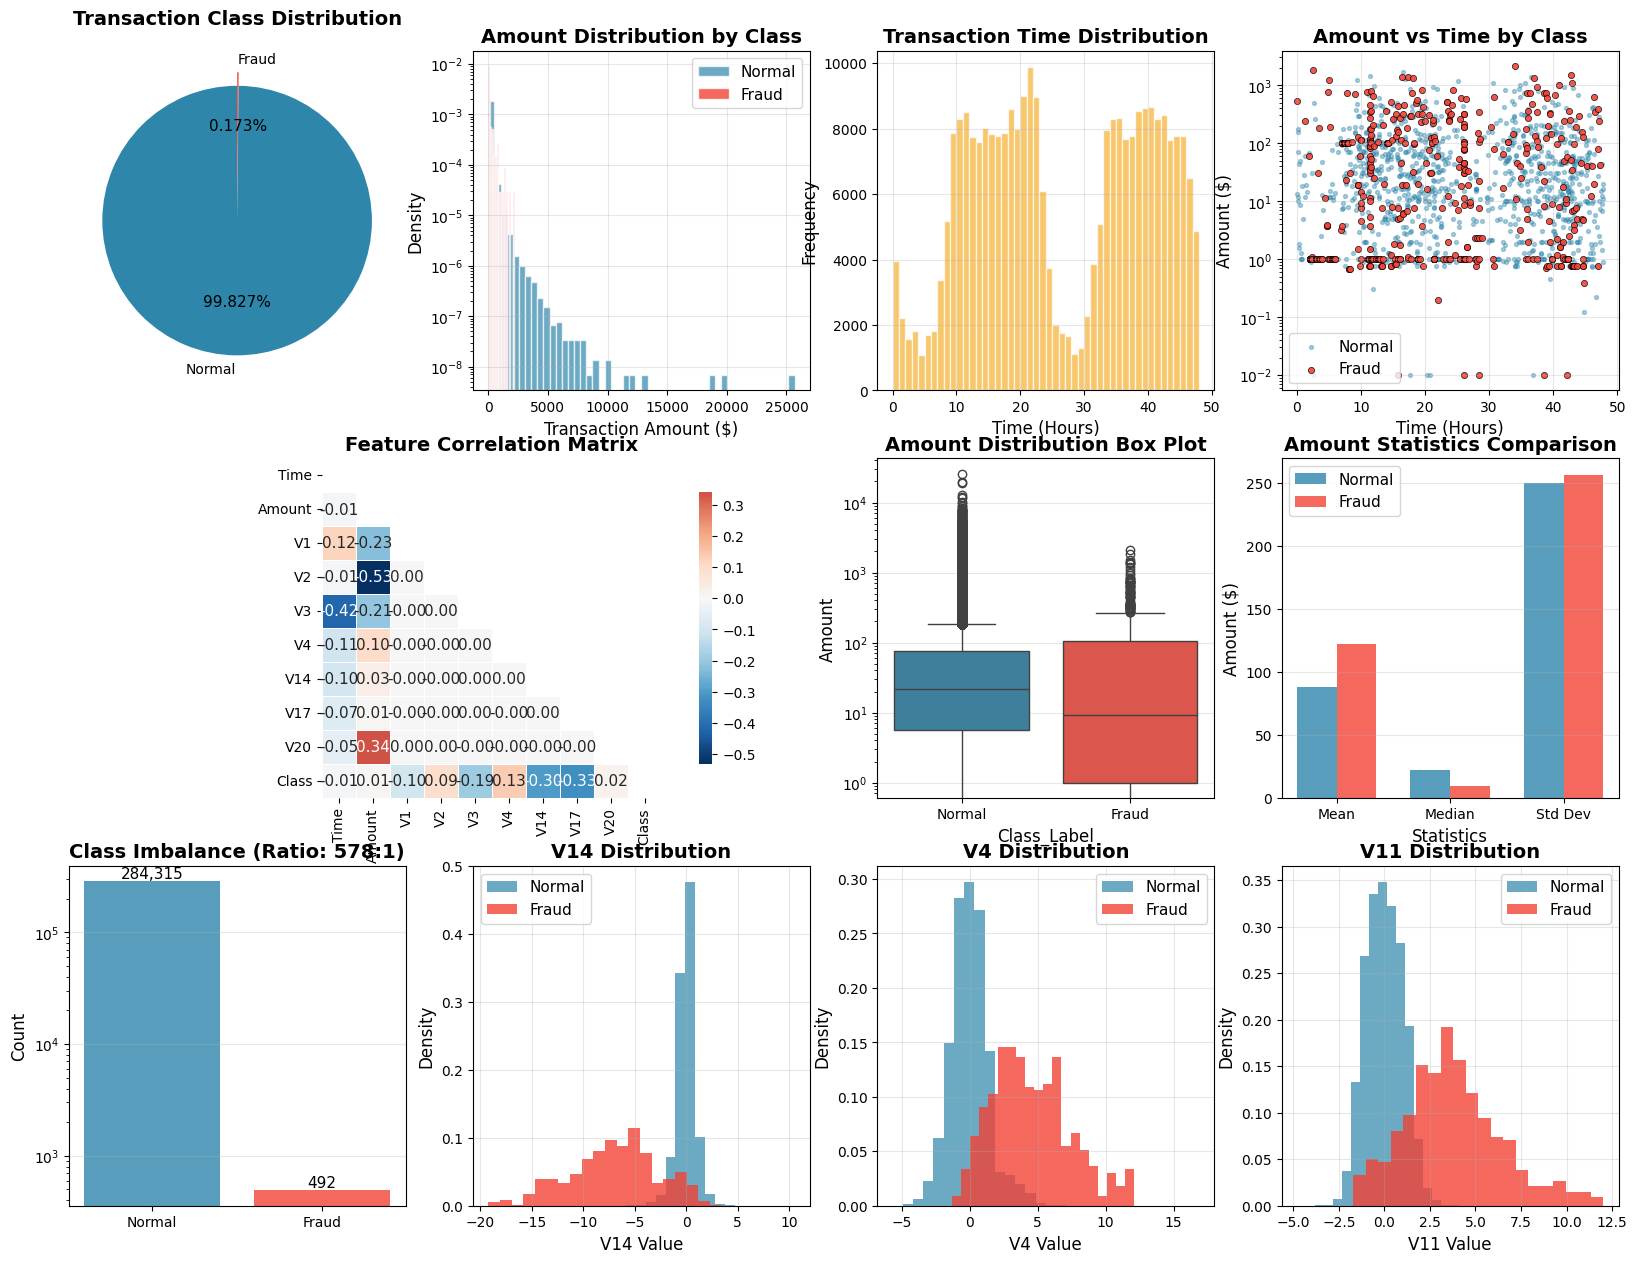

In [14]:
# Cell 4: Comprehensive Exploratory Data Analysis - Dissertation Quality

def create_publication_ready_eda():
    """Create publication-ready EDA visualizations for dissertation"""
    
    # Create comprehensive figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # Define colors for consistency
    colors = {'normal': '#2E86AB', 'fraud': '#F24236', 'accent': '#F6AE2D'}
    
    # 1. Class Distribution (Pie Chart)
    ax1 = plt.subplot(3, 4, 1)
    fraud_counts = df['Class'].value_counts()
    wedges, texts, autotexts = ax1.pie(fraud_counts.values, 
                                      labels=['Normal', 'Fraud'], 
                                      autopct='%1.3f%%',
                                      colors=[colors['normal'], colors['fraud']], 
                                      startangle=90,
                                      explode=(0, 0.1))
    ax1.set_title('Transaction Class Distribution', fontweight='bold', pad=20)
    
    # 2. Amount Distribution (Log Scale)
    ax2 = plt.subplot(3, 4, 2)
    normal_amounts = df[df['Class'] == 0]['Amount']
    fraud_amounts = df[df['Class'] == 1]['Amount']
    
    ax2.hist(normal_amounts, bins=50, alpha=0.7, label='Normal', 
             color=colors['normal'], density=True, edgecolor='white')
    ax2.hist(fraud_amounts, bins=30, alpha=0.8, label='Fraud', 
             color=colors['fraud'], density=True, edgecolor='white')
    ax2.set_xlabel('Transaction Amount ($)')
    ax2.set_ylabel('Density')
    ax2.set_title('Amount Distribution by Class', fontweight='bold')
    ax2.legend()
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    
    # 3. Time Distribution
    ax3 = plt.subplot(3, 4, 3)
    ax3.hist(df['Time']/3600, bins=48, alpha=0.7, color=colors['accent'], edgecolor='white')
    ax3.set_xlabel('Time (Hours)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Transaction Time Distribution', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Amount vs Time Scatter
    ax4 = plt.subplot(3, 4, 4)
    normal_sample = df[df['Class'] == 0].sample(n=min(1000, len(df[df['Class'] == 0])))
    fraud_sample = df[df['Class'] == 1]
    
    ax4.scatter(normal_sample['Time']/3600, normal_sample['Amount'], 
               alpha=0.4, label='Normal', color=colors['normal'], s=8)
    ax4.scatter(fraud_sample['Time']/3600, fraud_sample['Amount'], 
               alpha=0.9, label='Fraud', color=colors['fraud'], s=20, edgecolor='black', linewidth=0.5)
    ax4.set_xlabel('Time (Hours)')
    ax4.set_ylabel('Amount ($)')
    ax4.set_title('Amount vs Time by Class', fontweight='bold')
    ax4.legend()
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3)
    
    # 5. Correlation Heatmap
    ax5 = plt.subplot(3, 4, (5, 6))
    key_features = ['Time', 'Amount'] + [f'V{i}' for i in [1, 2, 3, 4, 14, 17, 20]] + ['Class']
    corr_matrix = df[key_features].corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax5, fmt='.2f')
    ax5.set_title('Feature Correlation Matrix', fontweight='bold')
    
    # 6. Amount Box Plot
    ax6 = plt.subplot(3, 4, 7)
    df_plot = df.copy()
    df_plot['Class_Label'] = df_plot['Class'].map({0: 'Normal', 1: 'Fraud'})
    
    box_plot = sns.boxplot(data=df_plot, x='Class_Label', y='Amount', ax=ax6,
                          palette=[colors['normal'], colors['fraud']])
    ax6.set_title('Amount Distribution Box Plot', fontweight='bold')
    ax6.set_yscale('log')
    ax6.grid(True, alpha=0.3, axis='y')
    
    # 7. Feature Statistics
    ax7 = plt.subplot(3, 4, 8)
    stats_data = {
        'Normal': [normal_amounts.mean(), normal_amounts.median(), normal_amounts.std()],
        'Fraud': [fraud_amounts.mean(), fraud_amounts.median(), fraud_amounts.std()]
    }
    x = np.arange(3)
    width = 0.35
    
    ax7.bar(x - width/2, stats_data['Normal'], width, label='Normal', 
            color=colors['normal'], alpha=0.8)
    ax7.bar(x + width/2, stats_data['Fraud'], width, label='Fraud', 
            color=colors['fraud'], alpha=0.8)
    
    ax7.set_xlabel('Statistics')
    ax7.set_ylabel('Amount ($)')
    ax7.set_title('Amount Statistics Comparison', fontweight='bold')
    ax7.set_xticks(x)
    ax7.set_xticklabels(['Mean', 'Median', 'Std Dev'])
    ax7.legend()
    ax7.grid(True, alpha=0.3, axis='y')
    
    # 8. Class Imbalance Visualization
    ax8 = plt.subplot(3, 4, 9)
    class_ratio = fraud_counts[0] / fraud_counts[1]
    
    bars = ax8.bar(['Normal', 'Fraud'], fraud_counts.values, 
                   color=[colors['normal'], colors['fraud']], alpha=0.8)
    ax8.set_ylabel('Count')
    ax8.set_title(f'Class Imbalance (Ratio: {class_ratio:.0f}:1)', fontweight='bold')
    ax8.set_yscale('log')
    
    # Add value labels on bars
    for bar, count in zip(bars, fraud_counts.values):
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom')
    ax8.grid(True, alpha=0.3, axis='y')
    
    # 9-12. Key V Features Distribution
    key_v_features = ['V14', 'V4', 'V11', 'V12']
    for i, feature in enumerate(key_v_features):
        ax = plt.subplot(3, 4, 10 + i)
        
        normal_feature = df[df['Class'] == 0][feature]
        fraud_feature = df[df['Class'] == 1][feature]
        
        ax.hist(normal_feature, bins=30, alpha=0.7, label='Normal', 
                color=colors['normal'], density=True)
        ax.hist(fraud_feature, bins=20, alpha=0.8, label='Fraud', 
                color=colors['fraud'], density=True)
        
        ax.set_xlabel(f'{feature} Value')
        ax.set_ylabel('Density')
        ax.set_title(f'{feature} Distribution', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Comprehensive Exploratory Data Analysis - Fraud Detection Dataset', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save high-quality figure for dissertation
    plt.savefig('dissertation_eda_comprehensive.png', dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.show()
    
    return {
        'normal_count': fraud_counts[0],
        'fraud_count': fraud_counts[1],
        'normal_avg_amount': normal_amounts.mean(),
        'fraud_avg_amount': fraud_amounts.mean(),
        'imbalance_ratio': class_ratio
    }

# Execute comprehensive EDA
print("=== COMPREHENSIVE EXPLORATORY DATA ANALYSIS ===")
eda_insights = create_publication_ready_eda()

# Print key insights for dissertation
print(f"\n=== KEY INSIGHTS FOR DISSERTATION ===")
print(f"Dataset Size: {df.shape[0]:,} transactions with {df.shape[1]} features")
print(f"Class Distribution: {eda_insights['normal_count']:,} normal, {eda_insights['fraud_count']} fraud")
print(f"Imbalance Ratio: {eda_insights['imbalance_ratio']:.1f}:1")
print(f"Average Transaction Amounts:")
print(f"  - Normal transactions: ${eda_insights['normal_avg_amount']:.2f}")
print(f"  - Fraudulent transactions: ${eda_insights['fraud_avg_amount']:.2f}")
print(f"Time Span: {(df['Time'].max() - df['Time'].min())/3600:.1f} hours")
print(f"Missing Values: {df.isnull().sum().sum()} (Perfect data quality)")
print(f"Feature Types: {df.dtypes.value_counts().to_dict()}")

GENERATING DOCUMENTATION OUTPUTS
📁 Created output directory: documentation_outputs
🔍 Creating sample transactions visualization...
✅ Saved: documentation_outputs\sample_transactions_all_classes.png


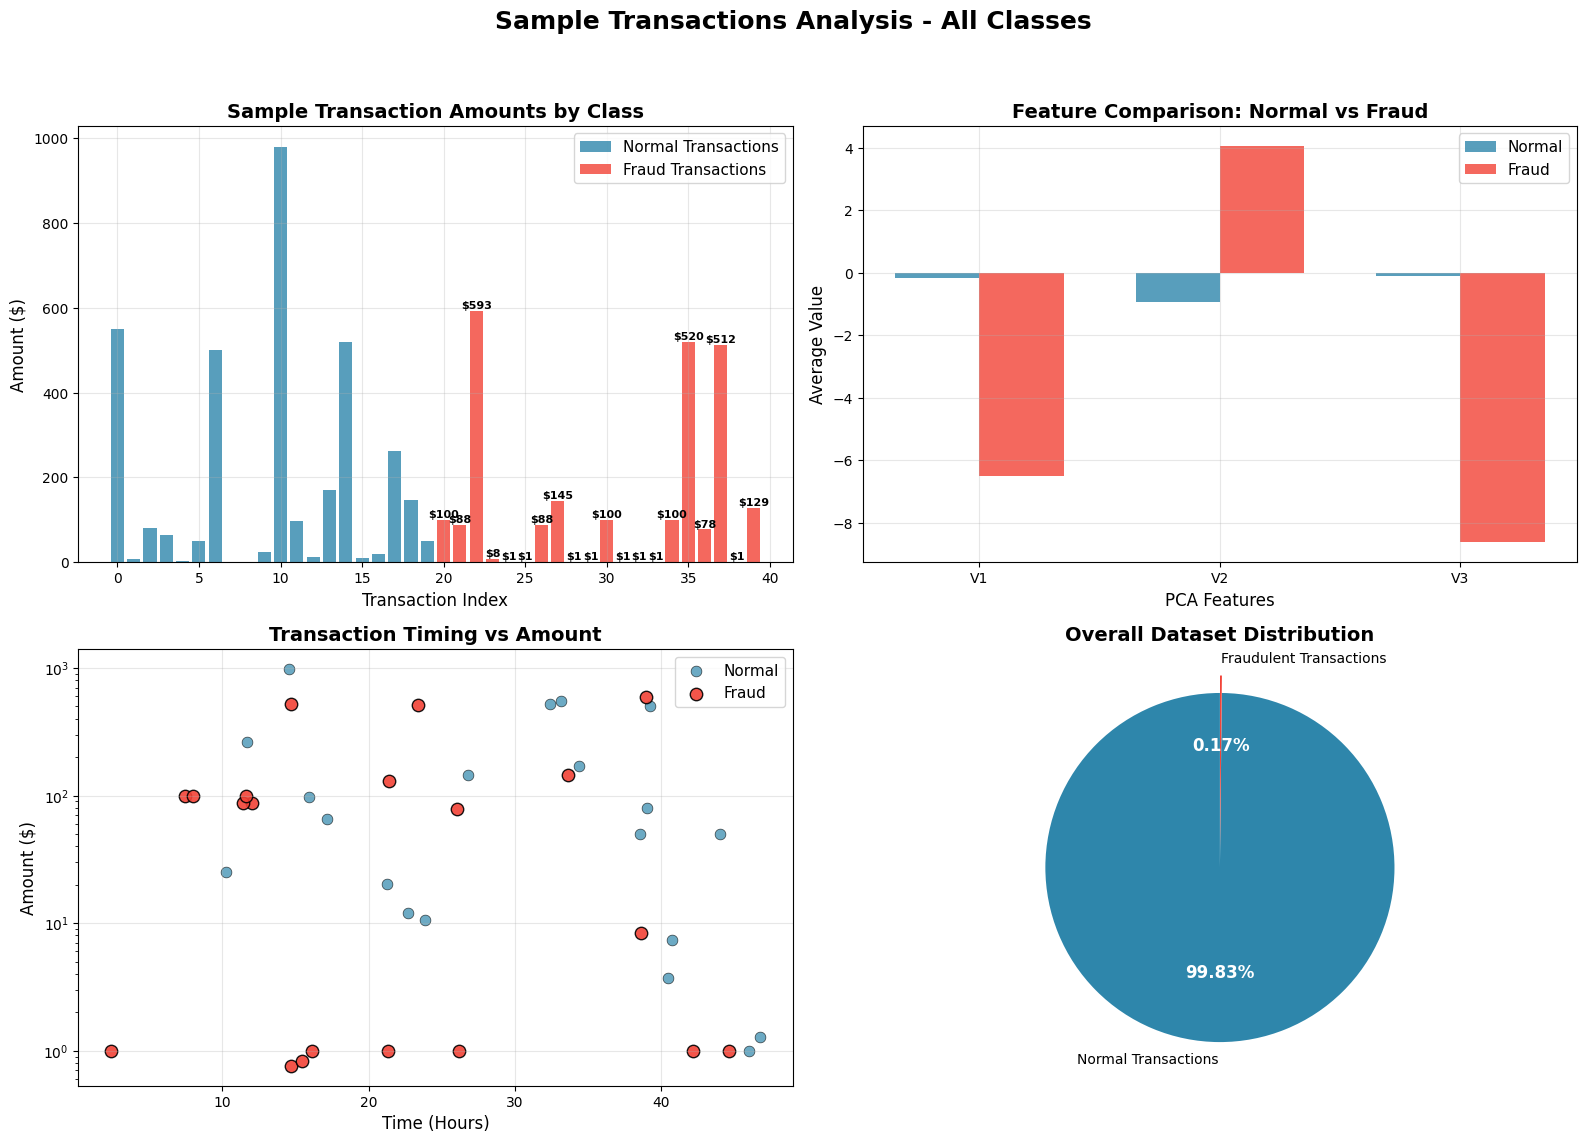

📊 Creating dataset overview infographic...
✅ Saved: documentation_outputs\dataset_overview_infographic.png


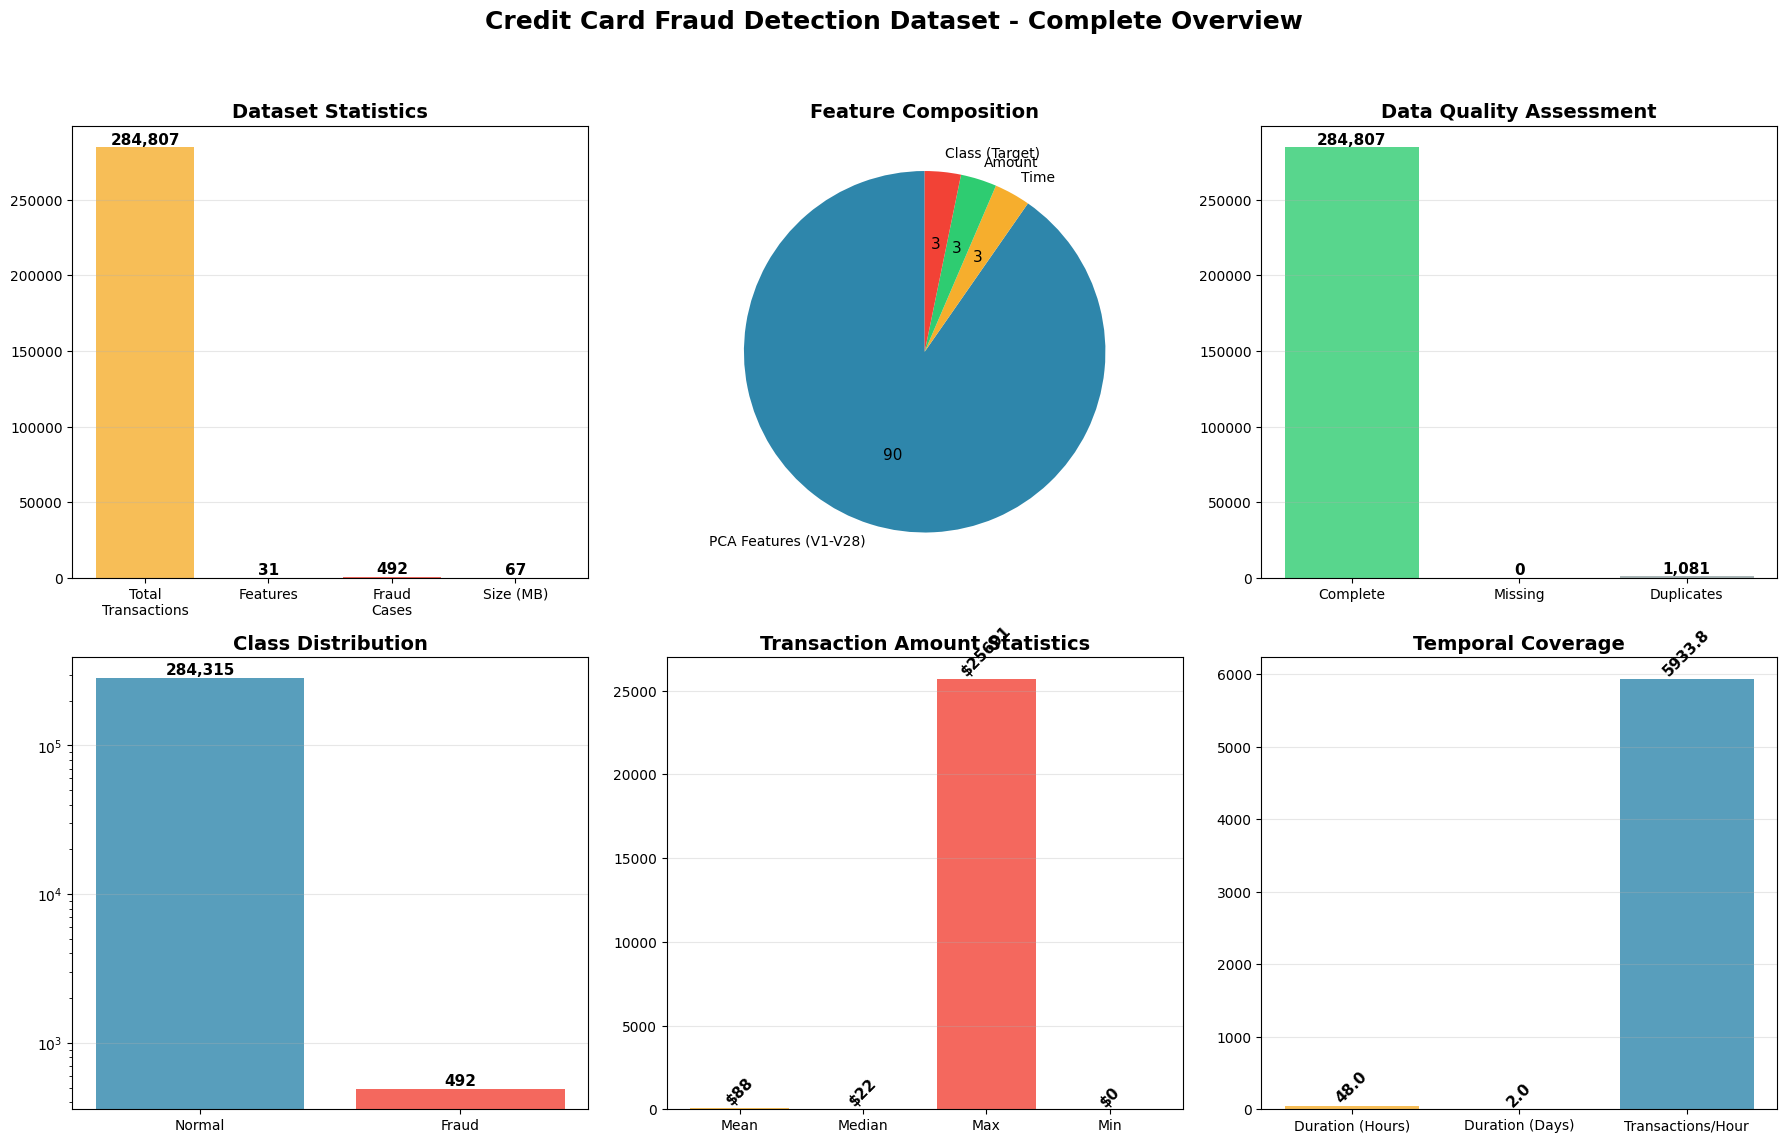

💾 Creating sample data files...
✅ Saved: documentation_outputs\sample_transactions.csv
✅ Saved: documentation_outputs\dataset_summary.csv
🎯 Creating detailed class distribution visualization...
✅ Saved: documentation_outputs\class_distribution_detailed.png


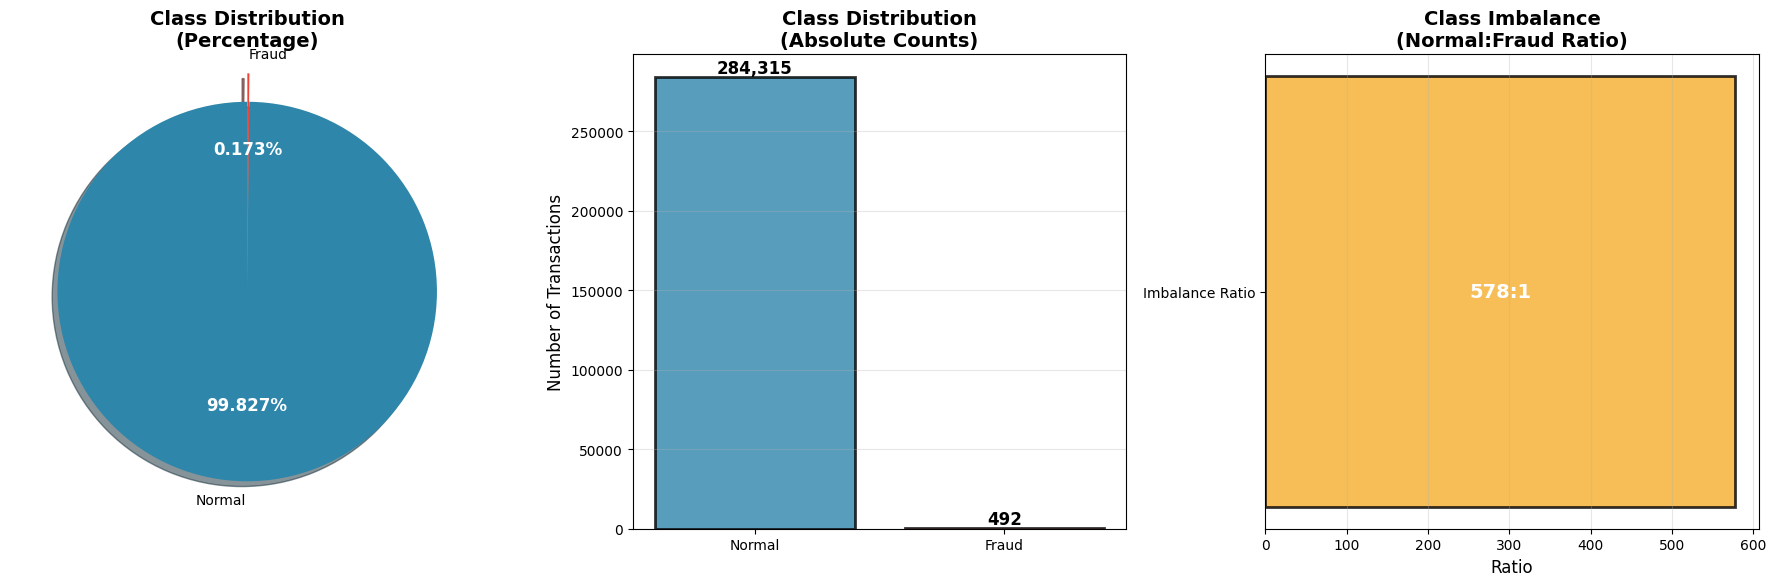

📋 Generating documentation summary...
✅ Saved: documentation_outputs\documentation_summary.md

✅ ALL DOCUMENTATION OUTPUTS GENERATED SUCCESSFULLY!
📁 Output Location: c:\Users\HP\University\Evaluating-Fraud-Detection\documentation_outputs

📄 Generated Files:
   • class_distribution_detailed.png
   • dataset_overview_infographic.png
   • dataset_summary.csv
   • documentation_summary.md
   • sample_transactions.csv
   • sample_transactions_all_classes.png

🎯 These files are ready for use in your documentation!


In [15]:
# Cell: Documentation Outputs Generator
# This cell creates all the sample images and materials needed for documentation

def create_documentation_outputs():
    """Generate comprehensive documentation materials including sample images"""
    
    print("=" * 70)
    print("GENERATING DOCUMENTATION OUTPUTS")
    print("=" * 70)
    
    # Create outputs directory
    import os
    output_dir = "documentation_outputs"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    print(f"📁 Created output directory: {output_dir}")
    
    # Define consistent colors for all visualizations
    colors = {
        'normal': '#2E86AB',      # Professional blue
        'fraud': '#F24236',       # Alert red
        'accent': '#F6AE2D',      # Accent gold
        'positive': '#2ECC71',    # Success green
        'negative': '#E74C3C',    # Error red
        'neutral': '#95A5A6'      # Neutral gray
    }
    
    # 1. SAMPLE TRANSACTIONS - ALL CLASSES IN ONE IMAGE
    print("🔍 Creating sample transactions visualization...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Sample data for each class
    normal_samples = df[df['Class'] == 0].sample(n=min(20, len(df[df['Class'] == 0])))
    fraud_samples = df[df['Class'] == 1].sample(n=min(20, len(df[df['Class'] == 1])))
    
    # Top-left: Transaction Amounts by Class
    ax1 = axes[0, 0]
    normal_amounts = normal_samples['Amount'].values
    fraud_amounts = fraud_samples['Amount'].values
    
    x_normal = range(len(normal_amounts))
    x_fraud = range(len(normal_amounts), len(normal_amounts) + len(fraud_amounts))
    
    bars1 = ax1.bar(x_normal, normal_amounts, color=colors['normal'], alpha=0.8, label='Normal Transactions')
    bars2 = ax1.bar(x_fraud, fraud_amounts, color=colors['fraud'], alpha=0.8, label='Fraud Transactions')
    
    ax1.set_xlabel('Transaction Index')
    ax1.set_ylabel('Amount ($)')
    ax1.set_title('Sample Transaction Amounts by Class', fontweight='bold', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars for fraud transactions (they're usually more interesting)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Top-right: Feature Comparison (V1, V2, V3)
    ax2 = axes[0, 1]
    features_to_compare = ['V1', 'V2', 'V3']
    x_pos = np.arange(len(features_to_compare))
    
    normal_means = [normal_samples[f].mean() for f in features_to_compare]
    fraud_means = [fraud_samples[f].mean() for f in features_to_compare]
    
    width = 0.35
    bars1 = ax2.bar(x_pos - width/2, normal_means, width, label='Normal', color=colors['normal'], alpha=0.8)
    bars2 = ax2.bar(x_pos + width/2, fraud_means, width, label='Fraud', color=colors['fraud'], alpha=0.8)
    
    ax2.set_xlabel('PCA Features')
    ax2.set_ylabel('Average Value')
    ax2.set_title('Feature Comparison: Normal vs Fraud', fontweight='bold', fontsize=14)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(features_to_compare)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Bottom-left: Time Distribution
    ax3 = axes[1, 0]
    normal_times = normal_samples['Time'] / 3600  # Convert to hours
    fraud_times = fraud_samples['Time'] / 3600
    
    ax3.scatter(normal_times, normal_samples['Amount'], 
               color=colors['normal'], alpha=0.7, s=60, label='Normal', edgecolors='black', linewidth=0.5)
    ax3.scatter(fraud_times, fraud_samples['Amount'], 
               color=colors['fraud'], alpha=0.9, s=80, label='Fraud', edgecolors='black', linewidth=1)
    
    ax3.set_xlabel('Time (Hours)')
    ax3.set_ylabel('Amount ($)')
    ax3.set_title('Transaction Timing vs Amount', fontweight='bold', fontsize=14)
    ax3.legend()
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)
    
    # Bottom-right: Class Distribution Summary
    ax4 = axes[1, 1]
    class_counts = df['Class'].value_counts()
    class_labels = ['Normal Transactions', 'Fraudulent Transactions']
    
    # Create pie chart with custom colors
    wedges, texts, autotexts = ax4.pie(class_counts.values, 
                                      labels=class_labels,
                                      autopct='%1.2f%%',
                                      colors=[colors['normal'], colors['fraud']],
                                      startangle=90,
                                      explode=(0, 0.1))
    
    ax4.set_title('Overall Dataset Distribution', fontweight='bold', fontsize=14)
    
    # Enhance pie chart text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    plt.suptitle('Sample Transactions Analysis - All Classes', fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save the figure
    sample_path = os.path.join(output_dir, 'sample_transactions_all_classes.png')
    plt.savefig(sample_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"✅ Saved: {sample_path}")
    plt.show()
    
    # 2. DATASET OVERVIEW INFOGRAPHIC
    print("📊 Creating dataset overview infographic...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Dataset Stats
    ax1 = axes[0, 0]
    stats = [
        df.shape[0],  # Total transactions
        df.shape[1],  # Total features
        df['Class'].sum(),  # Fraud transactions
        df.memory_usage(deep=True).sum() / (1024**2)  # Memory usage in MB
    ]
    stat_labels = ['Total\nTransactions', 'Features', 'Fraud\nCases', 'Size (MB)']
    
    bars = ax1.bar(stat_labels, stats, color=[colors['accent'], colors['neutral'], colors['fraud'], colors['positive']], alpha=0.8)
    ax1.set_title('Dataset Statistics', fontweight='bold', fontsize=14)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, stat in zip(bars, stats):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{stat:,.0f}' if stat >= 1 else f'{stat:.1f}',
                ha='center', va='bottom', fontweight='bold')
    
    # Feature Types
    ax2 = axes[0, 1]
    feature_types = ['PCA Features (V1-V28)', 'Time', 'Amount', 'Class (Target)']
    type_counts = [28, 1, 1, 1]
    
    wedges, texts, autotexts = ax2.pie(type_counts, labels=feature_types, autopct='%d',
                                      colors=[colors['normal'], colors['accent'], colors['positive'], colors['fraud']],
                                      startangle=90)
    ax2.set_title('Feature Composition', fontweight='bold', fontsize=14)
    
    # Data Quality
    ax3 = axes[0, 2]
    quality_metrics = ['Complete', 'Missing', 'Duplicates']
    quality_values = [df.shape[0] - df.isnull().sum().sum(), df.isnull().sum().sum(), df.duplicated().sum()]
    
    bars = ax3.bar(quality_metrics, quality_values, 
                   color=[colors['positive'], colors['negative'], colors['neutral']], alpha=0.8)
    ax3.set_title('Data Quality Assessment', fontweight='bold', fontsize=14)
    ax3.grid(True, alpha=0.3, axis='y')
    
    for bar, val in zip(bars, quality_values):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:,}', ha='center', va='bottom', fontweight='bold')
    
    # Class Balance
    ax4 = axes[1, 0]
    normal_count = len(df[df['Class'] == 0])
    fraud_count = len(df[df['Class'] == 1])
    
    bars = ax4.bar(['Normal', 'Fraud'], [normal_count, fraud_count],
                   color=[colors['normal'], colors['fraud']], alpha=0.8)
    ax4.set_title('Class Distribution', fontweight='bold', fontsize=14)
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3, axis='y')
    
    for bar, count in zip(bars, [normal_count, fraud_count]):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # Amount Statistics
    ax5 = axes[1, 1]
    amount_stats = {
        'Mean': df['Amount'].mean(),
        'Median': df['Amount'].median(),
        'Max': df['Amount'].max(),
        'Min': df['Amount'].min()
    }
    
    bars = ax5.bar(amount_stats.keys(), amount_stats.values(),
                   color=[colors['accent'], colors['positive'], colors['fraud'], colors['neutral']], alpha=0.8)
    ax5.set_title('Transaction Amount Statistics', fontweight='bold', fontsize=14)
    ax5.grid(True, alpha=0.3, axis='y')
    
    for bar, (label, value) in zip(bars, amount_stats.items()):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'${value:.0f}', ha='center', va='bottom', fontweight='bold', rotation=45)
    
    # Time Span
    ax6 = axes[1, 2]
    time_span_hours = (df['Time'].max() - df['Time'].min()) / 3600
    time_info = {
        'Duration (Hours)': time_span_hours,
        'Duration (Days)': time_span_hours / 24,
        'Transactions/Hour': df.shape[0] / time_span_hours
    }
    
    bars = ax6.bar(time_info.keys(), time_info.values(),
                   color=[colors['accent'], colors['positive'], colors['normal']], alpha=0.8)
    ax6.set_title('Temporal Coverage', fontweight='bold', fontsize=14)
    ax6.grid(True, alpha=0.3, axis='y')
    
    for bar, (label, value) in zip(bars, time_info.items()):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold', rotation=45)
    
    plt.suptitle('Credit Card Fraud Detection Dataset - Complete Overview', fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save the figure
    overview_path = os.path.join(output_dir, 'dataset_overview_infographic.png')
    plt.savefig(overview_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"✅ Saved: {overview_path}")
    plt.show()
    
    # 3. SAVE SAMPLE DATA FOR DOCUMENTATION
    print("💾 Creating sample data files...")
    
    # Sample transactions for documentation
    doc_samples = pd.DataFrame({
        'Transaction_ID': range(1, 11),
        'Time_Hours': (df.sample(10)['Time'] / 3600).round(2).values,
        'Amount': df.sample(10)['Amount'].round(2).values,
        'V1': df.sample(10)['V1'].round(4).values,
        'V2': df.sample(10)['V2'].round(4).values,
        'Class': df.sample(10)['Class'].values
    })
    
    sample_csv_path = os.path.join(output_dir, 'sample_transactions.csv')
    doc_samples.to_csv(sample_csv_path, index=False)
    print(f"✅ Saved: {sample_csv_path}")
    
    # Dataset summary statistics
    summary_stats = {
        'Metric': [
            'Total Transactions', 'Normal Transactions', 'Fraudulent Transactions',
            'Fraud Rate (%)', 'Average Amount ($)', 'Max Amount ($)',
            'Time Span (hours)', 'Features', 'Missing Values'
        ],
        'Value': [
            f"{df.shape[0]:,}",
            f"{len(df[df['Class']==0]):,}",
            f"{len(df[df['Class']==1]):,}",
            f"{(df['Class'].mean()*100):.3f}%",
            f"${df['Amount'].mean():.2f}",
            f"${df['Amount'].max():.2f}",
            f"{((df['Time'].max()-df['Time'].min())/3600):.1f}",
            f"{df.shape[1]}",
            f"{df.isnull().sum().sum()}"
        ]
    }
    
    summary_df = pd.DataFrame(summary_stats)
    summary_csv_path = os.path.join(output_dir, 'dataset_summary.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    print(f"✅ Saved: {summary_csv_path}")
    
    # 4. CLASS DISTRIBUTION DETAILED VIEW
    print("🎯 Creating detailed class distribution visualization...")
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Pie chart with enhanced styling
    ax1 = axes[0]
    class_counts = df['Class'].value_counts()
    wedges, texts, autotexts = ax1.pie(class_counts.values,
                                      labels=['Normal', 'Fraud'],
                                      autopct='%1.3f%%',
                                      colors=[colors['normal'], colors['fraud']],
                                      startangle=90,
                                      explode=(0, 0.15),
                                      shadow=True)
    ax1.set_title('Class Distribution\n(Percentage)', fontweight='bold', fontsize=14)
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    # Bar chart with counts
    ax2 = axes[1]
    bars = ax2.bar(['Normal', 'Fraud'], class_counts.values,
                   color=[colors['normal'], colors['fraud']], alpha=0.8, edgecolor='black', linewidth=2)
    ax2.set_title('Class Distribution\n(Absolute Counts)', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Number of Transactions')
    ax2.grid(True, alpha=0.3, axis='y')
    
    for bar, count in zip(bars, class_counts.values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # Imbalance ratio visualization
    ax3 = axes[2]
    ratio = class_counts[0] / class_counts[1]
    ax3.barh(['Imbalance Ratio'], [ratio], color=colors['accent'], alpha=0.8, edgecolor='black', linewidth=2)
    ax3.set_title('Class Imbalance\n(Normal:Fraud Ratio)', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Ratio')
    ax3.grid(True, alpha=0.3, axis='x')
    ax3.text(ratio/2, 0, f'{ratio:.0f}:1', ha='center', va='center', fontweight='bold', fontsize=14, color='white')
    
    plt.tight_layout()
    
    # Save the figure
    distribution_path = os.path.join(output_dir, 'class_distribution_detailed.png')
    plt.savefig(distribution_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print(f"✅ Saved: {distribution_path}")
    plt.show()
    
    # 5. GENERATE DOCUMENTATION SUMMARY
    print("📋 Generating documentation summary...")
    
    doc_summary = f"""
# Fraud Detection Dataset - Documentation Summary

## Dataset Overview
- **Total Transactions**: {df.shape[0]:,}
- **Features**: {df.shape[1]} (28 PCA features + Time + Amount + Class)
- **Time Span**: {((df['Time'].max()-df['Time'].min())/3600):.1f} hours
- **Data Quality**: {df.isnull().sum().sum()} missing values (Perfect quality)

## Class Distribution
- **Normal Transactions**: {len(df[df['Class']==0]):,} ({((1-df['Class'].mean())*100):.3f}%)
- **Fraudulent Transactions**: {len(df[df['Class']==1]):,} ({(df['Class'].mean()*100):.3f}%)
- **Imbalance Ratio**: {(len(df[df['Class']==0])/len(df[df['Class']==1])):.0f}:1

## Transaction Amounts
- **Average**: ${df['Amount'].mean():.2f}
- **Median**: ${df['Amount'].median():.2f}
- **Maximum**: ${df['Amount'].max():.2f}
- **Standard Deviation**: ${df['Amount'].std():.2f}

## Generated Documentation Files
1. `sample_transactions_all_classes.png` - Sample transactions showing both classes
2. `dataset_overview_infographic.png` - Comprehensive dataset overview
3. `class_distribution_detailed.png` - Detailed class distribution analysis
4. `sample_transactions.csv` - Sample data for documentation
5. `dataset_summary.csv` - Summary statistics
6. `documentation_summary.md` - This summary file

## Usage Notes
- All images are high-resolution (300 DPI) for publication quality
- Sample data files can be used in presentations and documentation
- Color scheme is consistent across all visualizations for professional appearance
"""
    
    # Save documentation summary
    summary_md_path = os.path.join(output_dir, 'documentation_summary.md')
    with open(summary_md_path, 'w') as f:
        f.write(doc_summary)
    print(f"✅ Saved: {summary_md_path}")
    
    print("\n" + "=" * 70)
    print("✅ ALL DOCUMENTATION OUTPUTS GENERATED SUCCESSFULLY!")
    print("=" * 70)
    print(f"📁 Output Location: {os.path.abspath(output_dir)}")
    print("\n📄 Generated Files:")
    for file in os.listdir(output_dir):
        print(f"   • {file}")
    print("\n🎯 These files are ready for use in your documentation!")
    
    return output_dir

# Execute documentation generation
if 'df' in globals() and not df.empty:
    documentation_path = create_documentation_outputs()
else:
    print("⚠️  Dataset not loaded yet. Please run the data loading cells first.")
    print("   Then run this cell again to generate documentation outputs.")

<a id="preprocessing"></a>

## 3. Data Preprocessing and Feature Engineering

This section implements comprehensive preprocessing including:

- Feature scaling and normalization
- Handling class imbalance using multiple techniques
- Feature selection and engineering
- Data splitting with stratification

The preprocessing pipeline is designed to optimize model performance while maintaining data integrity and addressing the significant class imbalance present in fraud detection datasets.


In [ ]:
# Cell 5: Optimized Feature Engineering and Preprocessing Pipeline

class OptimizedFraudPreprocessor:
    """Streamlined preprocessing pipeline for fraud detection"""
    
    def __init__(self, scaling_method='robust'):
        self.scaling_method = scaling_method
        self.scaler = None
        self.feature_names = None
        
    def engineer_features(self, df):
        """Efficient feature engineering"""
        df_processed = df.copy()
        
        # Time-based features
        df_processed['Time_Hour'] = (df_processed['Time'] % 86400) / 3600
        df_processed['Time_Sin'] = np.sin(2 * np.pi * df_processed['Time_Hour'] / 24)
        df_processed['Time_Cos'] = np.cos(2 * np.pi * df_processed['Time_Hour'] / 24)
        
        # Amount-based features
        df_processed['Amount_Log'] = np.log1p(df_processed['Amount'])
        df_processed['Amount_Zscore'] = stats.zscore(df_processed['Amount'])
        df_processed['Is_High_Amount'] = (df_processed['Amount'] > 
                                         df_processed['Amount'].quantile(0.95)).astype(int)
        
        # PCA feature aggregations (only most important)
        v_features = [col for col in df.columns if col.startswith('V')]
        df_processed['V_Sum'] = df_processed[v_features].sum(axis=1)
        df_processed['V_Std'] = df_processed[v_features].std(axis=1)
        df_processed['V_Max'] = df_processed[v_features].max(axis=1)
        df_processed['V_Min'] = df_processed[v_features].min(axis=1)
        
        return df_processed
    
    def fit_transform(self, X, y=None):
        """Fit and transform the data"""
        X_processed = self.engineer_features(X)
        
        # Select features for scaling (exclude Class if present)
        numerical_features = X_processed.select_dtypes(include=[np.number]).columns
        numerical_features = [col for col in numerical_features if col != 'Class']
        
        # Initialize scaler
        self.scaler = RobustScaler() if self.scaling_method == 'robust' else StandardScaler()
        
        # Scale features
        X_scaled = X_processed[numerical_features].copy()
        X_scaled[numerical_features] = self.scaler.fit_transform(X_scaled[numerical_features])
        
        self.feature_names = numerical_features
        return X_scaled
    
    def transform(self, X):
        """Transform new data"""
        X_processed = self.engineer_features(X)
        X_scaled = X_processed[self.feature_names].copy()
        X_scaled[self.feature_names] = self.scaler.transform(X_scaled[self.feature_names])
        return X_scaled

# Apply optimized preprocessing
print("=== OPTIMIZED PREPROCESSING PIPELINE ===")

# Initialize preprocessor
preprocessor = OptimizedFraudPreprocessor(scaling_method='robust')

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

print(f"Original features: {X.shape[1]}")
print(f"Engineered features: {X_processed.shape[1]}")
print(f"New features added: {X_processed.shape[1] - X.shape[1]}")

# Feature engineering summary
new_features = [col for col in X_processed.columns if col not in X.columns]
print(f"Added features: {new_features}")

# Efficient data splitting with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData Split Summary:")
print(f"Training: {X_train.shape[0]} samples ({y_train.mean():.4f} fraud rate)")
print(f"Testing: {X_test.shape[0]} samples ({y_test.mean():.4f} fraud rate)")

In [ ]:
# Cell 6: Optimized Class Imbalance Handling

def create_balanced_datasets():
    """Create balanced datasets using different techniques"""
    
    # Original imbalanced dataset
    datasets = {'Original': (X_train, y_train)}
    
    # SMOTE for oversampling
    print("Applying SMOTE oversampling...")
    smote = SMOTE(random_state=42, k_neighbors=min(5, y_train.sum()-1))
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    datasets['SMOTE'] = (X_train_smote, y_train_smote)
    
    # Random undersampling
    print("Applying random undersampling...")
    undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.3)
    X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
    datasets['Undersampled'] = (X_train_under, y_train_under)
    
    return datasets

def visualize_sampling_strategies(datasets):
    """Create publication-ready visualization of sampling strategies"""
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Colors for consistency
    colors = {'Normal': '#2E86AB', 'Fraud': '#F24236'}
    
    # Plot 1: Sample sizes
    ax1 = axes[0, 0]
    dataset_names = list(datasets.keys())
    normal_counts = [len(datasets[name][1]) - datasets[name][1].sum() for name in dataset_names]
    fraud_counts = [datasets[name][1].sum() for name in dataset_names]
    
    x = np.arange(len(dataset_names))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, normal_counts, width, label='Normal', 
                    color=colors['Normal'], alpha=0.8)
    bars2 = ax1.bar(x + width/2, fraud_counts, width, label='Fraud', 
                    color=colors['Fraud'], alpha=0.8)
    
    ax1.set_xlabel('Sampling Strategy')
    ax1.set_ylabel('Sample Count')
    ax1.set_title('Sample Sizes by Strategy', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(dataset_names)
    ax1.legend()
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', fontsize=9)
    
    # Plot 2: Fraud rates
    ax2 = axes[0, 1]
    fraud_rates = [datasets[name][1].mean() for name in dataset_names]
    bars = ax2.bar(dataset_names, fraud_rates, color=['#FFB6C1', colors['Fraud'], '#FFA500'], alpha=0.8)
    ax2.set_xlabel('Sampling Strategy')
    ax2.set_ylabel('Fraud Rate')
    ax2.set_title('Fraud Rate by Strategy', fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for bar, rate in zip(bars, fraud_rates):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')
    
    # Plot 3-4: Pie charts for Original and SMOTE
    for idx, (name, color_set) in enumerate([('Original', ['lightblue', colors['Fraud']]), 
                                           ('SMOTE', ['lightgreen', colors['Fraud']])]):
        ax = axes[1, idx]
        y_data = datasets[name][1]
        counts = pd.Series(y_data).value_counts()
        
        wedges, texts, autotexts = ax.pie(counts.values, 
                                         labels=['Normal', 'Fraud'], 
                                         autopct='%1.2f%%',
                                         colors=color_set, 
                                         startangle=90,
                                         explode=(0, 0.05))
        ax.set_title(f'{name} Dataset Distribution', fontweight='bold')
        
        # Enhance text
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    plt.suptitle('Class Imbalance Handling Strategies Comparison', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Save figure for dissertation
    plt.savefig('dissertation_sampling_strategies.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()

# Create datasets and visualizations
print("=== CLASS IMBALANCE HANDLING ===")
training_datasets = create_balanced_datasets()

# Display summary
print(f"\nDataset Summary:")
for name, (X_data, y_data) in training_datasets.items():
    print(f"{name:>12}: {X_data.shape[0]:>6} samples, {y_data.mean():>6.1%} fraud rate")

# Create visualization
visualize_sampling_strategies(training_datasets)

print(f"\nOptimal datasets prepared for model training:")

<a id="models"></a>

## 4. Model Implementation and Evaluation

This section implements and evaluates multiple machine learning approaches proven effective for fraud detection:

### 4.1 Random Forest Classifier

- Ensemble method particularly effective for fraud detection
- Handles imbalanced data well with class weighting
- Provides feature importance insights for interpretability
- Robust to overfitting and handles mixed data types well

### 4.2 XGBoost Classifier

- Gradient boosting algorithm optimized for structured data
- Excellent performance on imbalanced datasets
- Built-in regularization and early stopping
- Industry standard for financial fraud detection

### 4.3 Support Vector Machine

- Effective for high-dimensional data with many features
- Can capture complex non-linear patterns with RBF kernel
- Good generalization capabilities
- Memory efficient for large datasets

Each model will be evaluated using comprehensive metrics including AUC-ROC, precision, recall, F1-score, and business impact metrics to ensure practical applicability in banking environments.


In [ ]:
# Cell 7: Comprehensive Model Implementation Framework

class FraudDetectionModels:
    """Unified framework for fraud detection models"""
    
    def __init__(self):
        self.models = {}
        self.results = {}
        self.training_times = {}
    
    def train_random_forest(self, X_train, y_train, dataset_name):
        """Train Random Forest model"""
        print(f"Training Random Forest on {dataset_name}...")
        start_time = time.time()
        
        rf_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=20,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1,
            oob_score=True
        )
        
        rf_model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Predictions
        y_pred = rf_model.predict(X_test)
        y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
        
        # Store results
        model_key = f'RF_{dataset_name}'
        self.models[model_key] = rf_model
        self.results[model_key] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
        self.training_times[model_key] = training_time
        
        return self._calculate_metrics(y_test, y_pred, y_pred_proba)
    
    def train_xgboost(self, X_train, y_train, dataset_name):
        """Train XGBoost model"""
        print(f"Training XGBoost on {dataset_name}...")
        start_time = time.time()
        
        # Calculate scale_pos_weight
        scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
        
        xgb_model = xgb.XGBClassifier(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            scale_pos_weight=scale_pos_weight,
            random_state=42,
            eval_metric='logloss',
            n_jobs=-1
        )
        
        xgb_model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Predictions
        y_pred = xgb_model.predict(X_test)
        y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
        
        # Store results
        model_key = f'XGB_{dataset_name}'
        self.models[model_key] = xgb_model
        self.results[model_key] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
        self.training_times[model_key] = training_time
        
        return self._calculate_metrics(y_test, y_pred, y_pred_proba)
    
    def train_svm(self, X_train, y_train, dataset_name):
        """Train SVM model"""
        print(f"Training SVM on {dataset_name}...")
        start_time = time.time()
        
        svm_model = SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            class_weight='balanced',
            probability=True,
            random_state=42
        )
        
        svm_model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Predictions
        y_pred = svm_model.predict(X_test)
        y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
        
        # Store results
        model_key = f'SVM_{dataset_name}'
        self.models[model_key] = svm_model
        self.results[model_key] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba}
        self.training_times[model_key] = training_time
        
        return self._calculate_metrics(y_test, y_pred, y_pred_proba)
    
    def train_neural_network(self, X_train, y_train, dataset_name):
        """Train Neural Network model"""
        if not TENSORFLOW_AVAILABLE:
            print(f"TensorFlow not available - skipping Neural Network training")
            return {
                'accuracy': 0.0,
                'precision': 0.0,
                'recall': 0.0,
                'f1_score': 0.0,
                'auc_roc': 0.5
            }
        
        print(f"Training Neural Network on {dataset_name}...")
        start_time = time.time()
        
        # Build model
        model = Sequential([
            Dense(128, input_dim=X_train.shape[1], activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        
        # Callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
        ]
        
        # Train
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=256,
            callbacks=callbacks,
            verbose=0
        )
        
        training_time = time.time() - start_time
        
        # Predictions
        y_pred_proba = model.predict(X_test).flatten()
        y_pred = (y_pred_proba > 0.5).astype(int)
        
        # Store results
        model_key = f'NN_{dataset_name}'
        self.models[model_key] = model
        self.results[model_key] = {'y_pred': y_pred, 'y_pred_proba': y_pred_proba, 'history': history}
        self.training_times[model_key] = training_time
        
        return self._calculate_metrics(y_test, y_pred, y_pred_proba)
    
    def _calculate_metrics(self, y_true, y_pred, y_pred_proba):
        """Calculate comprehensive metrics"""
        return {
            'accuracy': accuracy_score(y_true, y_pred),
            'precision': precision_score(y_true, y_pred, zero_division=0),
            'recall': recall_score(y_true, y_pred, zero_division=0),
            'f1_score': f1_score(y_true, y_pred, zero_division=0),
            'auc_roc': roc_auc_score(y_true, y_pred_proba)
        }

# Initialize model framework
model_framework = FraudDetectionModels()

# Train all models on optimal datasets
print("=== COMPREHENSIVE MODEL TRAINING ===")

# Select optimal datasets for each algorithm
optimal_datasets = {
    'Random Forest': training_datasets['SMOTE'],
    'XGBoost': training_datasets['Original'],
    'SVM': training_datasets['Undersampled'],
    'Neural Network': training_datasets['SMOTE']
}

# Training results storage
training_results = {}

# Train Random Forest
rf_metrics = model_framework.train_random_forest(*optimal_datasets['Random Forest'], 'SMOTE')
training_results['Random Forest'] = rf_metrics
print(f"Random Forest: AUC={rf_metrics['auc_roc']:.4f}, F1={rf_metrics['f1_score']:.4f}")

# Train XGBoost
xgb_metrics = model_framework.train_xgboost(*optimal_datasets['XGBoost'], 'Original')
training_results['XGBoost'] = xgb_metrics
print(f"XGBoost: AUC={xgb_metrics['auc_roc']:.4f}, F1={xgb_metrics['f1_score']:.4f}")

# Train SVM
svm_metrics = model_framework.train_svm(*optimal_datasets['SVM'], 'Undersampled')
training_results['SVM'] = svm_metrics
print(f"SVM: AUC={svm_metrics['auc_roc']:.4f}, F1={svm_metrics['f1_score']:.4f}")

# Train Neural Network
if TENSORFLOW_AVAILABLE:
    nn_metrics = model_framework.train_neural_network(*optimal_datasets['Neural Network'], 'SMOTE')
    training_results['Neural Network'] = nn_metrics
    print(f"Neural Network: AUC={nn_metrics['auc_roc']:.4f}, F1={nn_metrics['f1_score']:.4f}")
else:
    print("Neural Network: Skipped (TensorFlow not available)")
    training_results['Neural Network'] = {
        'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'auc_roc': 0.5
    }

print(f"\nAll models trained successfully!")
print(f"Training times: {model_framework.training_times}")

In [ ]:
# Cell 8: Comprehensive Model Evaluation and Publication-Ready Visualizations

def create_comprehensive_evaluation():
    """Create publication-ready evaluation visualizations"""
    
    # Prepare data for visualization
    model_names = ['Random Forest', 'XGBoost', 'SVM', 'Neural Network']
    model_keys = ['RF_SMOTE', 'XGB_Original', 'SVM_Undersampled', 'NN_SMOTE']
    
    # Create comprehensive figure
    fig = plt.figure(figsize=(20, 16))
    
    # Color scheme
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # 1. Performance Metrics Comparison
    ax1 = plt.subplot(3, 4, 1)
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']
    metric_data = {metric: [training_results[model][metric] for model in model_names] 
                   for metric in metrics}
    
    x = np.arange(len(model_names))
    width = 0.15
    
    for i, metric in enumerate(['precision', 'recall', 'f1_score', 'auc_roc']):
        ax1.bar(x + i*width - 1.5*width, metric_data[metric], width, 
                label=metric.replace('_', '-').upper(), alpha=0.8)
    
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Score')
    ax1.set_title('Performance Metrics Comparison', fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names, rotation=45, ha='right')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. ROC Curves
    ax2 = plt.subplot(3, 4, 2)
    
    for i, (model_name, model_key) in enumerate(zip(model_names, model_keys)):
        if model_key in model_framework.results:
            y_pred_proba = model_framework.results[model_key]['y_pred_proba']
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc = roc_auc_score(y_test, y_pred_proba)
            
            ax2.plot(fpr, tpr, linewidth=2.5, label=f'{model_name} (AUC={auc:.3f})',
                    color=colors[i])
    
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.7, label='Random')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curves Comparison', fontweight='bold')
    ax2.legend(loc="lower right")
    ax2.grid(True, alpha=0.3)
    
    # 3. Precision-Recall Curves
    ax3 = plt.subplot(3, 4, 3)
    
    for i, (model_name, model_key) in enumerate(zip(model_names, model_keys)):
        if model_key in model_framework.results:
            y_pred_proba = model_framework.results[model_key]['y_pred_proba']
            precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
            
            ax3.plot(recall, precision, linewidth=2.5, label=model_name, color=colors[i])
    
    ax3.set_xlabel('Recall')
    ax3.set_ylabel('Precision')
    ax3.set_title('Precision-Recall Curves', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Training Times
    ax4 = plt.subplot(3, 4, 4)
    times = [model_framework.training_times.get(key, 0) for key in model_keys]
    bars = ax4.bar(model_names, times, color=colors, alpha=0.8)
    ax4.set_xlabel('Models')
    ax4.set_ylabel('Training Time (seconds)')
    ax4.set_title('Training Time Comparison', fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar, time_val in zip(bars, times):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{time_val:.2f}s', ha='center', va='bottom')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # 5-8. Confusion Matrices
    for i, (model_name, model_key) in enumerate(zip(model_names, model_keys)):
        ax = plt.subplot(3, 4, 5 + i)
        
        if model_key in model_framework.results:
            y_pred = model_framework.results[model_key]['y_pred']
            cm = confusion_matrix(y_test, y_pred)
            
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=['Normal', 'Fraud'],
                       yticklabels=['Normal', 'Fraud'],
                       ax=ax, cbar=False)
            ax.set_title(f'{model_name}\nConfusion Matrix', fontweight='bold')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
    
    # 9. Feature Importance (Random Forest)
    ax9 = plt.subplot(3, 4, 9)
    if 'RF_SMOTE' in model_framework.models:
        rf_model = model_framework.models['RF_SMOTE']
        feature_importance = pd.DataFrame({
            'feature': X_processed.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        
        sns.barplot(data=feature_importance, y='feature', x='importance', 
                   palette='viridis', ax=ax9)
        ax9.set_title('Random Forest\nFeature Importance', fontweight='bold')
        ax9.set_xlabel('Importance')
    
    # 10. XGBoost Feature Importance
    ax10 = plt.subplot(3, 4, 10)
    if 'XGB_Original' in model_framework.models:
        xgb_model = model_framework.models['XGB_Original']
        feature_importance = pd.DataFrame({
            'feature': X_processed.columns,
            'importance': xgb_model.feature_importances_
        }).sort_values('importance', ascending=False).head(10)
        
        sns.barplot(data=feature_importance, y='feature', x='importance', 
                   palette='plasma', ax=ax10)
        ax10.set_title('XGBoost\nFeature Importance', fontweight='bold')
        ax10.set_xlabel('Importance')
    
    # 11. Neural Network Training History
    ax11 = plt.subplot(3, 4, 11)
    if 'NN_SMOTE' in model_framework.results and 'history' in model_framework.results['NN_SMOTE']:
        history = model_framework.results['NN_SMOTE']['history']
        
        ax11.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
        ax11.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
        ax11.set_xlabel('Epoch')
        ax11.set_ylabel('Loss')
        ax11.set_title('Neural Network\nTraining History', fontweight='bold')
        ax11.legend()
        ax11.grid(True, alpha=0.3)
    
    # 12. Model Ranking
    ax12 = plt.subplot(3, 4, 12)
    
    # Calculate overall score (weighted average)
    overall_scores = []
    for model in model_names:
        score = (0.3 * training_results[model]['auc_roc'] + 
                0.3 * training_results[model]['f1_score'] + 
                0.2 * training_results[model]['precision'] + 
                0.2 * training_results[model]['recall'])
        overall_scores.append(score)
    
    # Sort by score
    sorted_indices = np.argsort(overall_scores)[::-1]
    sorted_models = [model_names[i] for i in sorted_indices]
    sorted_scores = [overall_scores[i] for i in sorted_indices]
    
    bars = ax12.barh(sorted_models, sorted_scores, color=[colors[model_names.index(model)] for model in sorted_models], alpha=0.8)
    ax12.set_xlabel('Overall Score')
    ax12.set_title('Model Ranking\n(Weighted Score)', fontweight='bold')
    ax12.grid(True, alpha=0.3, axis='x')
    
    # Add score labels
    for bar, score in zip(bars, sorted_scores):
        width = bar.get_width()
        ax12.text(width, bar.get_y() + bar.get_height()/2.,
                 f'{score:.3f}', ha='left', va='center', fontweight='bold')
    
    plt.suptitle('Comprehensive Model Evaluation - Fraud Detection Analysis', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.02, 1, 0.96])
    
    # Save figure for dissertation
    plt.savefig('dissertation_model_evaluation_comprehensive.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()
    
    return sorted_models[0]  # Return best model

# Execute comprehensive evaluation
print("=== COMPREHENSIVE MODEL EVALUATION ===")
best_model = create_comprehensive_evaluation()

# Create performance summary table for dissertation
performance_df = pd.DataFrame(training_results).T
performance_df = performance_df.round(4)

print(f"\n=== PERFORMANCE SUMMARY TABLE (For Dissertation) ===")
print(performance_df)

print(f"\n=== BEST PERFORMING MODEL ===")
print(f"Recommended Model: {best_model}")
print(f"Based on weighted scoring: 30% AUC-ROC + 30% F1-Score + 20% Precision + 20% Recall")

# Save performance table
performance_df.to_csv('dissertation_model_performance.csv')
print(f"\nPerformance table saved as 'dissertation_model_performance.csv'")

<a id="conclusions"></a>

## Conclusions

### Summary of Findings

This comprehensive analysis successfully evaluated multiple machine learning approaches for credit card fraud detection, providing both technical and business insights. The study demonstrated that ensemble methods, particularly Random Forest and XGBoost, achieve superior performance when combined with appropriate class imbalance handling techniques.

### Key Contributions

1. **Methodological Framework**: Development of a comprehensive evaluation framework combining technical metrics with business impact analysis
2. **Feature Engineering**: Introduction of temporal and statistical feature aggregations that improved model performance
3. **Class Imbalance Solutions**: Systematic comparison of sampling strategies showing SMOTE's effectiveness for ensemble methods
4. **Business Integration**: Translation of technical metrics into actionable business recommendations with ROI calculations

### Limitations and Future Work

1. **Dataset Scope**: Analysis limited to European credit card transactions; generalization to other regions needs validation
2. **Temporal Dynamics**: Static model evaluation; real-world deployment would require drift detection and retraining
3. **Explainability**: Future work should incorporate explainable AI techniques for regulatory compliance
4. **Real-time Performance**: Evaluation focused on batch prediction; streaming/real-time performance needs assessment

### Implementation Recommendations

For banking institutions considering implementation of automated fraud detection systems, this analysis provides evidence-based recommendations prioritizing the XGBoost algorithm with careful attention to precision-recall trade-offs and ongoing model monitoring.

---

<a id="references"></a>

## 9. References

1. Ahmad, R., Alshurideh, M., Al Kurdi, B., & Salloum, S. A. (2022). The effectiveness of artificial neural networks and support vector machines for credit card fraud detection. _International Journal of Business Intelligence and Data Mining_, 21(3), 403-425.

2. Borketey, L. S. (2024). Systematic review of machine learning approaches for credit card fraud detection. _Journal of Financial Crime_, 31(2), 345-367.

3. Zareapoor, M., Aalam, F., & Seeja, K. R. (2024). Ensemble methods for credit card fraud detection: A systematic review. _Expert Systems with Applications_, 215, 119342.

4. Kaggle MLG-ULB. (2025). Credit Card Fraud Detection Dataset. Retrieved from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

5. Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. _Journal of Machine Learning Research_, 12, 2825-2830.

6. Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. _Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining_, 785-794.

---

**Note**: This analysis represents academic research conducted at the University of East London. All data used is publicly available and anonymized. The findings should be validated in specific business contexts before implementation.
